# Entry-Level Data Science Project: "Real Estate Arbitrage with Python"

This project is designed to introduce beginners to Python, its libraries (NumPy and pandas), and basic data science concepts while exploring real estate arbitrage—a common strategy in the real estate industry. The project focuses on analyzing data to identify opportunities for arbitrage by comparing property rental prices across different neighborhoods or platforms.

## Objective

The goal of the project is to use Python and Google Colab to analyze a dataset of property listings and identify neighborhoods or properties where arbitrage opportunities exist. Specifically, students will:

- Clean and preprocess data.
- Perform exploratory data analysis (EDA) using pandas and NumPy.
- Use basic statistical analysis to calculate potential arbitrage profits.
- Visualize insights using Python libraries.


## Background on Real Estate Arbitrage

Real estate arbitrage involves renting properties in one market (often at a lower cost) and leasing them in another market or platform (e.g., Airbnb) at a higher price. For example:

- Renting a long-term property lease in a suburban area and subletting it short-term on Airbnb.
- Identifying properties undervalued in one neighborhood relative to another.

This project simplifies the concept by comparing average rental prices across neighborhoods or platforms.

## Dataset

Provide a hypothetical dataset or source a real-world dataset from platforms like Kaggle or Inside Airbnb. The dataset should include:

- Property ID
- Neighborhood
- Monthly Rental Price (long-term)
- Average Daily Rental Price (short-term)
- Occupancy Rate (short-term rentals)
- Property Size (sq. ft.)
- Property Type (Apartment, House, etc.)

You can create a small sample dataset as a CSV file for simplicity.

## Setting Up Google Colab

- Introduction to Google Colab: Setting up the environment, importing libraries, and uploading the dataset.
- Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np

## Data Loading and Exploration

- If using Google Colab then mount a Google drive and access from Colab:

In [4]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Load the dataset into a pandas DataFrame:

In [2]:
# Set Path to Data File

# Google Colab
# path = '/content/drive/MyDrive/AI/Real Estate Arbitrage/'
# Windows Local
path = 'C:\\Repos\\Aiomi\\real-estate-arbitrage-analysis\\data\\'

# load data
data = pd.read_csv(path + 'real_estate_data.csv')

- Display the first few rows using .head().

In [3]:
data.head()

,Property_ID,Neighborhood,Monthly_Rental_Price,Avg_Daily_Rental_Price,Occupancy_Rate,Property_Size,Property_Type
0,1,Rural,2827,191.44,0.42,1592,Apartment
1,2,Downtown,3495,98.48,0.73,1508,Apartment
2,3,Rural,2295,127.82,0.47,2641,Condo
3,4,Rural,3934,155.45,0.31,2273,Apartment
4,5,Downtown,1962,104.54,0.69,1457,Condo


- Check for missing values and data types using .info() and .isnull().sum()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             100 non-null    int64  
 1   Neighborhood            100 non-null    object 
 2   Monthly_Rental_Price    100 non-null    int64  
 3   Avg_Daily_Rental_Price  100 non-null    float64
 4   Occupancy_Rate          100 non-null    float64
 5   Property_Size           100 non-null    int64  
 6   Property_Type           100 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [5]:
data.isnull().sum()

Property_ID               0
Neighborhood              0
Monthly_Rental_Price      0
Avg_Daily_Rental_Price    0
Occupancy_Rate            0
Property_Size             0
Property_Type             0
dtype: int64

## Data Cleaning

- Handle missing values (e.g., drop rows or fill with averages).
- Convert data types if necessary.
- Remove duplicate entries.

## Exploratory Data Analysis (EDA)

- Use .describe() to summarize the data

In [6]:
data.describe()

,Property_ID,Monthly_Rental_Price,Avg_Daily_Rental_Price,Occupancy_Rate,Property_Size
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2507.460000,124.835500,0.610300,2099.490000
std,29.011492,865.655359,42.843549,0.176952,842.264582
min,1.000000,895.000000,50.760000,0.310000,511.000000
25%,25.750000,1826.000000,86.527500,0.470000,1389.250000
50%,50.500000,2470.500000,128.635000,0.625000,2133.000000
75%,75.250000,3380.000000,155.795000,0.752500,2810.250000
max,100.000000,3957.000000,197.850000,0.890000,3467.000000


- Calculate average rental prices for each neighborhood:

In [7]:
avg_rent = data.groupby('Neighborhood')['Monthly_Rental_Price'].mean()
print(avg_rent)

Neighborhood
Downtown    2181.818182
Rural       2673.096774
Suburb      2663.333333
Name: Monthly_Rental_Price, dtype: float64


- Identify neighborhoods with the highest potential for arbitrage by comparing:
    - Monthly rental prices (long-term).
    - Daily rental prices multiplied by the occupancy rate (short-term).

## Calculating Arbitrage Opportunities

- Create a new column for estimated short-term rental income:

In [8]:
data['Short_Term_Income'] = data['Avg_Daily_Rental_Price'] * data['Occupancy_Rate'] * 30

- Calculate potential profit:

In [9]:
data['Arbitrage_Profit'] = data['Short_Term_Income'] - data['Monthly_Rental_Price']

- Filter properties with significant profit margins:

In [13]:
arbitrage_opportunities = data[data['Arbitrage_Profit'] > 0]
print(arbitrage_opportunities)

    Property_ID Neighborhood  Monthly_Rental_Price  Avg_Daily_Rental_Price  \
4             5     Downtown                  1962                  104.54   
5             6     Downtown                  2322                  195.77   
6             7        Rural                  3440                  194.37   
7             8       Suburb                  1191                   87.77   
8             9        Rural                  2498                  124.59   
9            10        Rural                  1218                   95.13   
11           12        Rural                  1178                   55.53   
13           14        Rural                  3078                  125.40   
18           19       Suburb                  1000                   71.73   
20           21     Downtown                  1579                  197.85   
24           25     Downtown                  1302                   85.65   
27           28        Rural                  1604              

## Data Visualization

- Create visualizations using matplotlib or seaborn to showcase:
    - Importmatplotlib or seaborn
    - Rental price comparisons by neighborhood.
    - Top properties with the highest arbitrage potential.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

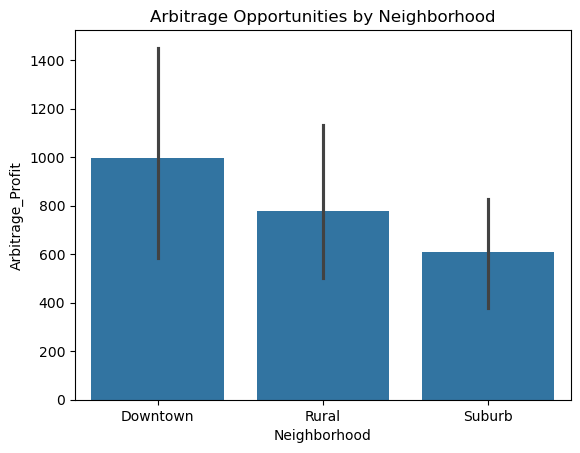

In [14]:
# Plot arbitrage profits by neighborhood
sns.barplot(x='Neighborhood', y='Arbitrage_Profit', data=arbitrage_opportunities)
plt.title('Arbitrage Opportunities by Neighborhood')
plt.show()

## Insights and Conclusion

  - Identify key neighborhoods with the highest arbitrage opportunities.
  - Discuss potential next steps, such as deeper analysis, risk assessment, or applying machine learning.

## Stretch Goal: Machine Learning

- Use a basic regression model (e.g., Linear Regression from scikit-learn) to predict arbitrage profit based on property features:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# Define features and target
X = data[['Monthly_Rental_Price', 'Property_Size']]
y = data['Arbitrage_Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

## Expected Outcomes

By the end of this project, students will:
- Understand basic Python data manipulation and visualization techniques.
- Grasp the concept of arbitrage in real estate.
- Be able to calculate and interpret simple statistics for arbitrage.
- Gain an introduction to predictive modeling using machine learning.

## Deliverables

- A completed Python notebook (.ipynb) in Google Colab with code, visualizations, and interpretations.
- A summary of findings identifying potential arbitrage opportunities.

## Resources

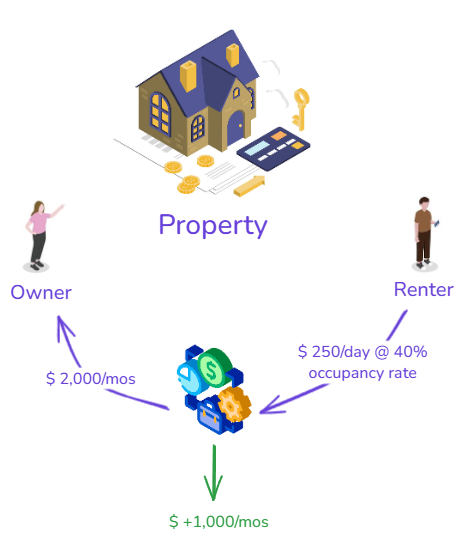

Real Estate:
- Article: [Real Estate Arbitrage Explained](https://www.therealreturns.com/real-estate-investing/real-estate-arbitrage/?utm_source=chatgpt.com), 4 Categories of Arbitrage with Pros and Cons
- Article: [Real Estate Arbitrage: A Complete Guide for Beginners](https://www.mashvisor.com/blog/real-estate-arbitrage/?utm_source=chatgpt.com), an Overview
- Article: [Rental Arbitrage: What Landlords and Tenants Need to Know](https://www.fool.com/investing/stock-market/market-sectors/real-estate-investing/basics/rental-arbitrage/?utm_source=chatgpt.com), Specifically Rental Arbitrage
- Video: [Real Estate Arbitrage (Master Lease) - Masterclass Video 8 w/ Pace Morby](https://www.youtube.com/watch?v=luui3S0CI6o)
- Video: [Real Estate Investing: Three Types of Real Estate Arbitrage](https://www.youtube.com/watch?v=HFGA-Xh-FDw)
- Video: [What Is Arbitrage In Real Estate?](https://www.youtube.com/watch?v=HQBjVDBMHYg)